# Report

## TD3

---

#### Start the environment

In [1]:
from td3 import TD3Agent
from trainer import Trainer
from environment import Env
import numpy as np

env_filename = "../Tennis_Linux/Tennis.x86_64"
env = Env(env_filename, train_mode=True)

low = np.array([-1] * env.action_size)
high = np.array([1] * env.action_size)
action_bounds = (low, high)

Found path: /home/andres/Documentos/projects/cursos/tennis/src/../Tennis_Linux/Tennis.x86_64
Mono path[0] = '/home/andres/Documentos/projects/cursos/tennis/src/../Tennis_Linux/Tennis_Data/Managed'
Mono config path = '/home/andres/Documentos/projects/cursos/tennis/src/../Tennis_Linux/Tennis_Data/MonoBleedingEdge/etc'
Preloaded 'ScreenSelector.so'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	ScreenSelector.so
	libgrpc_csharp_ext.x86.so
Logging to /home/andres/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


#### Examine the State and Action Spaces

In [2]:
print("Number of agents:", env.num_agents)
print("Number of actions:", env.action_size)
print("States have length:", env.state_size)

Number of agents: 2
Number of actions: 2
States have length: 24


#### Init Trainer and train the agent

In [3]:
trainer = Trainer(
    max_episodes=5000,
    save_model_path="../tennis.pth",
    save_checkpoint_path="../tennis_checkpoint.pth",
    override_checkpoint=True,
    disable_bar_progress=True
)
agent = TD3Agent(
    state_size=env.state_size,
    action_bounds=action_bounds,
    batch_size=256,
    n_envs=env.num_agents,
    noise_decay_steps=5000
)
scores = trainer.train_until(env, agent, desired_score=0.5, consecutive_episodes=100)

Episode 1 Score [-0.00 -0.00 -0.00]
Episode 101 Score [0.05 0.02 0.00]]
Episode 201 Score [-0.00 -0.00 0.00]
Episode 301 Score [-0.00 -0.00 0.00]
Episode 401 Score [-0.00 -0.00 -0.00]
Episode 501 Score [-0.00 0.02 -0.00]]
Episode 601 Score [-0.00 -0.00 -0.00]
Episode 701 Score [-0.00 -0.00 -0.00]
Episode 801 Score [-0.00 -0.00 -0.00]
Episode 901 Score [-0.00 -0.00 -0.00]
Episode 1001 Score [-0.00 -0.00 -0.00]
Episode 1101 Score [-0.00 -0.00 -0.00]
Episode 1201 Score [-0.00 -0.00 -0.00]
Episode 1301 Score [-0.00 -0.00 -0.00]
Episode 1401 Score [-0.00 -0.00 -0.00]
Episode 1501 Score [-0.00 -0.00 -0.00]
Episode 1601 Score [-0.00 -0.00 -0.00]
Episode 1701 Score [-0.00 -0.00 -0.00]
Episode 1801 Score [-0.00 -0.00 -0.00]
Episode 1901 Score [-0.00 -0.00 -0.00]
Episode 2001 Score [-0.00 -0.00 -0.00]
Episode 2101 Score [-0.00 -0.00 -0.00]
Episode 2201 Score [-0.00 -0.00 -0.00]
Episode 2301 Score [-0.00 -0.00 -0.00]
Episode 2401 Score [-0.00 -0.00 -0.00]
Episode 2501 Score [-0.00 -0.00 -0.00]
Ep

The values on the score shows the last score, the average of the last five scores and the average of the last 100 scores. [Last, Avg5, Avg100]

#### Plot the scores

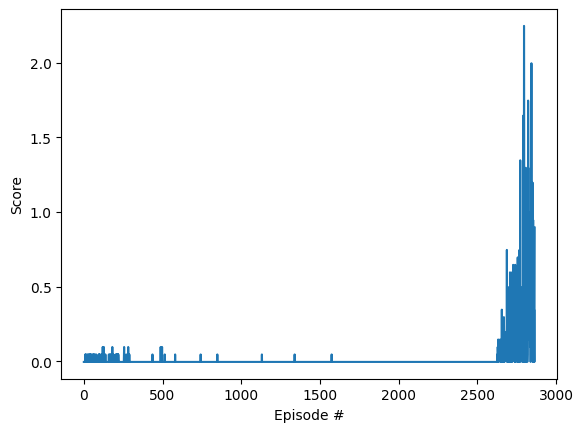

In [4]:
trainer.plot_scores(scores)

## Hyperparameters

---

The hyperparameters used can be found in the agent.py file for td3 folder.

### TD3

```python
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 256  # minibatch size
GAMMA = 0.99  # discount factor
TAU = 1e-2  # for soft update of target parameters
LR_ACTOR = 5e-4  # learning rate of the actor
LR_CRITIC = 5e-4  # learning rate of the critic
WEIGHT_DECAY = 0  # L2 weight decay
UPDATE_EVERY = 4  # how often to update the network
MIN_BUFFER_SIZE = 1e4  # minimum buffer size before learning

ACTOR_HIDDEN_LAYER_1 = 256
ACTOR_HIDDEN_LAYER_2 = 128

CRITIC_HIDDEN_LAYER_1 = 256
CRITIC_HIDDEN_LAYER_2 = 128

# Gradient clipping
POLICY_MAX_GRAD_NORM = float("inf")
VALUE_MAX_GRAD_NORM = float("inf")

# Prioritized Experience Replay (PER)
PER_ALPHA = 0.6
PER_BETA_START = 0.4
PER_BETA_INCREMENT = 0.001
PER_EPSILON = 1e-5

# Noise
POLICY_NOISE_RATIO = 0.1
POLICY_NOISE_CLIP_RATIO = 0.5
```